# 📊 REGRESIÓN LINEAL SIMPLE

## 🎯 Objetivo del Ejercicio

En este notebook aprenderemos a implementar y evaluar un modelo de **regresión lineal simple** usando Python y scikit-learn. La regresión lineal simple es una técnica estadística que nos permite:

- **Predecir** una variable continua (variable dependiente) basándose en otra variable (variable independiente)
- **Encontrar** la relación lineal entre dos variables
- **Cuantificar** qué tan fuerte es esta relación

## 🧮 Fundamentos Matemáticos

La regresión lineal simple busca la **mejor línea recta** que se ajuste a nuestros datos, representada por la ecuación:

$$y = \beta_0 + \beta_1 \cdot x + \epsilon$$

Donde:
- **y**: Variable dependiente (lo que queremos predecir)
- **x**: Variable independiente (lo que usamos para predecir)
- **β₀**: Intercepto (valor de y cuando x = 0)
- **β₁**: Pendiente (cambio en y por unidad de cambio en x)
- **ε**: Error o residuo

## 🏠 Caso de Estudio

Utilizaremos datos de precios de casas para predecir el **precio por metro cuadrado** basándose en los **años de antigüedad** de la propiedad.

# 📚 1. Importar las librerías necesarias

En esta sección importaremos todas las librerías que necesitamos para nuestro análisis:

- **NumPy**: Para operaciones matemáticas y manejo de arrays
- **Matplotlib**: Para crear visualizaciones de nuestros datos y resultados
- **Pandas**: Para manipular y analizar datos estructurados
- **Scikit-learn**: Para implementar el modelo de regresión lineal y métricas de evaluación

> 💡 **Tip**: Es una buena práctica importar todas las librerías al inicio del notebook para tener una visión clara de las dependencias del proyecto.

In [15]:
# Importamos las librerías necesarias para el análisis de regresión lineal simple
import numpy as np         # Para operaciones numéricas y manejo de arrays
import matplotlib.pyplot as plt  # Para visualización de datos y resultados
import pandas as pd        # Para manipulación y análisis de datos estructurados

# Importamos de la librería sklearn, la función train_test_split
# Esta función nos permite dividir automáticamente nuestros datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importamos la función StandardScaler para normalizar las variables (aunque no la usaremos en este ejercicio)
from sklearn.preprocessing import StandardScaler

# Importamos la función LinearRegression de la librería sklearn para crear nuestro modelo de regresión
from sklearn.linear_model import LinearRegression

# 📁 2. Cargar y explorar el dataset

El primer paso en cualquier proyecto de machine learning es **cargar** y **comprender** nuestros datos. Es fundamental conocer:

- La estructura de los datos
- Qué variables tenemos disponibles
- La calidad de los datos (valores faltantes, outliers, etc.)
- La relación aparente entre variables

> 🔍 **Pregunta clave**: ¿Esperamos que casas más antiguas tengan precios más altos o más bajos por metro cuadrado?

## Descripción del dataset

Este conjunto de datos contiene información sobre precios de casas por metro cuadrado en función de los años de antigüedad de cada propiedad. Es un dataset ideal para practicar regresión lineal simple ya que:

- **Variable independiente (X)**: Años de antigüedad de la casa
- **Variable dependiente (y)**: Precio por metro cuadrado
- **Objetivo**: Predecir el precio/m² basándose en la antigüedad de la propiedad

In [16]:
# Cargamos el dataset desde el archivo CSV
# Este dataset contiene información sobre precios de casas por metro cuadrado y años de antigüedad
dataset = pd.read_csv("../data/precio_casas.csv")

In [17]:
# Separamos las variables independientes (X) y la variable dependiente (y)
# X: Variable independiente - años de antigüedad de la casa (todas las columnas excepto la última)
X = dataset.iloc[:, :-1].values
# y: Variable dependiente - precio por metro cuadrado (segunda columna del dataset)
y = dataset.iloc[:, 1].values

# Nota: En regresión lineal simple, X debe tener una sola característica (variable predictora)

# 🔄 3. División de datos: Entrenamiento vs Prueba

## ¿Por qué dividir los datos?

La división de datos es **crucial** en machine learning para:

1. **Entrenar** el modelo con una porción de los datos
2. **Evaluar** su rendimiento en datos que nunca ha visto
3. **Evitar el sobreajuste** (overfitting)
4. **Obtener** una estimación realista del rendimiento del modelo

## 📊 Estrategia de división

- **🎓 Conjunto de entrenamiento** (67%): Datos que el modelo usará para aprender
- **🧪 Conjunto de prueba** (33%): Datos que usaremos para evaluar el modelo


## 🎲 Reproducibilidad

Utilizamos `random_state=0` para asegurar que siempre obtengamos la misma división, permitiendo que otros puedan reproducir nuestros resultados.

In [18]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba
# - 67% de los datos para entrenamiento (para que el modelo aprenda)
# - 33% de los datos para prueba (para evaluar el rendimiento del modelo)
# random_state=0 asegura reproducibilidad de los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [19]:
# Verificamos las dimensiones de nuestros conjuntos de datos
# Esto nos ayuda a confirmar que la división se realizó correctamente
print("Dimensiones de los conjuntos:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"Total de muestras de entrenamiento: {len(X_train)}")
print(f"Total de muestras de prueba: {len(X_test)}")

Dimensiones de los conjuntos:
X_train: (276, 1), X_test: (138, 1)
y_train: (276,), y_test: (138,)
Total de muestras de entrenamiento: 276
Total de muestras de prueba: 138


# 🤖 4. Creación y entrenamiento del modelo

## 🧠 ¿Cómo aprende el modelo?

El modelo de regresión lineal utiliza el **método de mínimos cuadrados** para encontrar la mejor línea recta que se ajuste a los datos. Este proceso:

1. **Calcula** todos los errores entre los valores reales y la línea propuesta
2. **Eleva al cuadrado** estos errores para evitar que se cancelen
3. **Encuentra** los coeficientes (β₀ y β₁) que minimizan la suma de errores cuadrados

## 🎯 Proceso de entrenamiento

Durante el entrenamiento, el algoritmo:
- Analiza la relación entre años de antigüedad (X) y precio/m² (y)
- Calcula automáticamente el intercepto (β₀) y la pendiente (β₁)
- Optimiza estos parámetros para minimizar el error total

## 📈 Resultado esperado

Al final del entrenamiento tendremos una ecuación del tipo:
**Precio/m² = β₀ + β₁ × Años_antigüedad**

In [20]:
# Creamos una instancia del modelo de regresión lineal
regression = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
# El modelo aprenderá la relación lineal entre años de antigüedad y precio/m²
# Internamente, sklearn calculará los coeficientes: y = β₀ + β₁*x
regression.fit(X_train, y_train)

# Una vez entrenado, el modelo ha calculado la mejor línea recta que se ajusta a los datos

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 🔮 5. Realizar predicciones en el conjunto de prueba

## 🎯 ¿Qué estamos haciendo?

Una vez que nuestro modelo ha **aprendido** la relación entre antigüedad y precio durante el entrenamiento, es momento de **ponerlo a prueba** con datos completamente nuevos.

## 🔍 Proceso de predicción

1. **Input**: Años de antigüedad de casas del conjunto de prueba
2. **Proceso**: El modelo aplica la ecuación aprendida: y = β₀ + β₁ × x
3. **Output**: Predicciones de precio por metro cuadrado

## 🎲 Momento de la verdad

Este es el momento crucial donde descubrimos si nuestro modelo:
- ✅ **Generaliza bien** a datos nuevos
- ❌ **Solo memorizó** los datos de entrenamiento (overfitting)

## 📊 ¿Qué esperamos?

Si el modelo es bueno, las predicciones deberían estar **cerca** de los valores reales del conjunto de prueba.

In [21]:
# Realizamos predicciones sobre el conjunto de prueba
# Estas predicciones nos permitirán evaluar qué tan bien generaliza nuestro modelo
# a datos que no ha visto durante el entrenamiento
y_pred = regression.predict(X_test)

# y_pred contiene los precios/m² predichos para las casas del conjunto de prueba

# 📊 6. Visualización: Resultados del entrenamiento

## 🔍 ¿Qué observar en la gráfica?

### ✅ Signos de un buen ajuste:
- Los puntos rojos están **cerca** de la línea azul
- La línea azul pasa por el **centro** de la nube de puntos
- No hay patrones evidentes en los residuos

### ⚠️ Signos de problemas:
- Los puntos están muy **dispersos** respecto a la línea
- La relación parece **no lineal** (curva en lugar de recta)
- Hay muchos **outliers** alejados de la línea

## 💡 Interpretación práctica

Esta gráfica nos muestra cómo el modelo "entiende" la relación entre antigüedad y precio durante el entrenamiento.

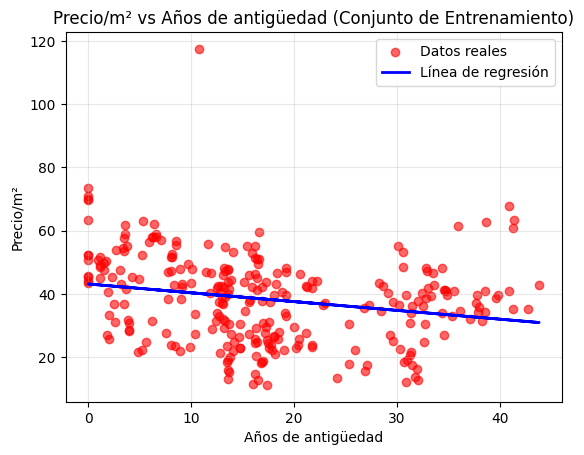

In [22]:
# Visualizamos los resultados del entrenamiento
# Puntos rojos: datos reales de entrenamiento
# Línea azul: línea de regresión ajustada por el modelo
plt.scatter(X_train, y_train, color = "red", alpha=0.6, label="Datos reales")
plt.plot(X_train, regression.predict(X_train), color = "blue", linewidth=2, label="Línea de regresión")
plt.title("Precio/m² vs Años de antigüedad (Conjunto de Entrenamiento)")
plt.xlabel("Años de antigüedad")
plt.ylabel("Precio/m²")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Esta gráfica nos muestra qué tan bien se ajusta nuestro modelo a los datos de entrenamiento

# 🧪 7. Visualización: Resultados en datos de prueba

## 🎯 La prueba de fuego

Esta es la **visualización más importante** del ejercicio. Aquí vemos si nuestro modelo realmente funciona en datos que nunca ha visto antes.

## 🔍 ¿Qué buscamos?

### ✅ Buena generalización:
- Los puntos rojos (datos reales) están **cerca** de la línea azul (predicciones)
- El patrón es **similar** al observado en el entrenamiento
- No hay diferencias **dramáticas** entre entrenamiento y prueba

### ❌ Problemas de generalización:
- Los puntos están muy **alejados** de la línea
- El patrón es **diferente** al del entrenamiento
- Las predicciones parecen **aleatorias**

## 🎲 Comparación clave

**Compara esta gráfica con la anterior**:
- Si son muy similares → ✅ **Buen modelo**
- Si son muy diferentes → ❌ **Overfitting**

## 💭 Reflexión

¿Los resultados coinciden con tu intuición sobre cómo la antigüedad afecta el precio de las casas?

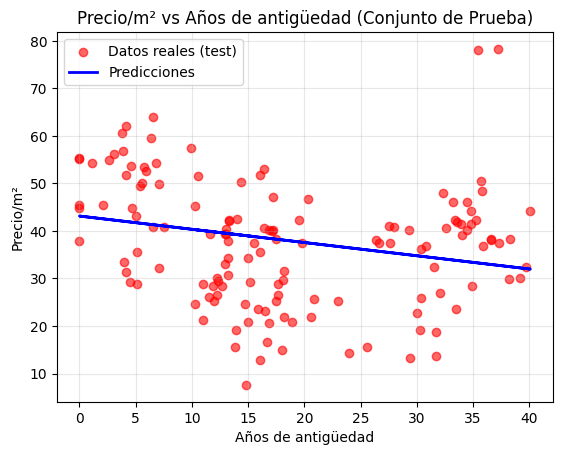

In [23]:
# Visualizamos los resultados en el conjunto de prueba
# Puntos rojos: valores reales del conjunto de prueba
# Línea azul: predicciones del modelo para el conjunto de prueba
plt.scatter(X_test, y_test, color = "red", alpha=0.6, label="Datos reales (test)")
plt.plot(X_test, regression.predict(X_test), color = "blue", linewidth=2, label="Predicciones")
plt.title("Precio/m² vs Años de antigüedad (Conjunto de Prueba)")
plt.xlabel("Años de antigüedad")
plt.ylabel("Precio/m²")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Esta gráfica es crucial: nos muestra qué tan bien generaliza nuestro modelo
# a datos nuevos que no vio durante el entrenamiento

# 🎯 8. Análisis detallado de errores

## 🔍 ¿Por qué analizar los errores?

El análisis de errores nos permite:

1. **Identificar** qué tan precisas son nuestras predicciones punto por punto
2. **Detectar** patrones en los errores que podrían indicar problemas del modelo
3. **Cuantificar** la magnitud de nuestros errores de predicción

## 📊 Interpretación de errores

### Tipos de error:
- **Error positivo** (+): El modelo **subestimó** el precio real
  - Ejemplo: Real = 100, Predicción = 90, Error = +10
- **Error negativo** (-): El modelo **sobreestimó** el precio real  
  - Ejemplo: Real = 80, Predicción = 95, Error = -15

### ¿Qué esperamos ver?
- **Errores pequeños**: Indica buenas predicciones
- **Errores balanceados**: Tanto positivos como negativos (no sesgo sistemático)
- **Errores sin patrón**: Los errores no siguen una tendencia clara

## 🎯 Objetivo

Idealmente, queremos que la mayoría de errores sean **pequeños** y que estén **distribuidos aleatoriamente** alrededor de cero.

In [24]:
# Creamos una tabla para analizar los errores punto por punto
# Comparamos valores reales vs predicciones y calculamos el error absoluto
errores = pd.DataFrame([y_test, y_pred, y_test-y_pred]).T
errores.columns = ['y_test (real)', 'y_pred (predicción)', 'error (real - predicción)']

# El error positivo indica que el modelo subestimó el precio
# El error negativo indica que el modelo sobreestimó el precio
errores

,y_test (real),y_pred (predicción),error (real - predicción)
0,45.3,40.266845,5.033155
1,14.4,36.452074,-22.052074
2,46.0,33.528344,12.471656
3,15.6,36.006553,-20.406553
4,50.2,39.125199,11.074801
...,...,...,...
133,21.8,37.398806,-15.598806
134,28.8,40.071930,-11.271930
135,29.3,38.902438,-9.602438
136,37.4,32.748683,4.651317


# 📈 9. Evaluación con R² Score (Coeficiente de Determinación)

El **coeficiente de determinación (R²)** es la métrica más importante para evaluar modelos de regresión. Nos dice:

> **"¿Qué porcentaje de la variabilidad en los precios puede explicar nuestro modelo?"**

## 📊 Interpretación del R²

### Escala de valores:
- **R² = 1.0** → 🎯 **Modelo perfecto** (explica 100% de la variabilidad)
- **R² = 0.8** → ✅ **Excelente modelo** (explica 80% de la variabilidad)
- **R² = 0.6** → ✅ **Buen modelo** (explica 60% de la variabilidad)
- **R² = 0.4** → ⚠️ **Modelo moderado** (explica 40% de la variabilidad)
- **R² = 0.0** → ❌ **Modelo inútil** (no mejor que usar la media)
- **R² < 0.0** → 💀 **Modelo pésimo** (peor que usar la media)

## 🧮 ¿Cómo se calcula?

$$R^2 = 1 - \frac{\text{Suma de errores cuadrados del modelo}}{\text{Suma de errores cuadrados usando la media}}$$

## 💡 Interpretación práctica

Si R² = 0.75, significa que nuestro modelo explica el **75% de las razones** por las que los precios varían entre casas.

In [25]:
# Importamos la métrica R² (coeficiente de determinación)
from sklearn.metrics import r2_score

# Calculamos el R² score para evaluar la calidad del modelo
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f"Coeficiente de determinación (R²): {r2:.4f}")
print(f"Esto significa que el modelo explica el {r2*100:.2f}% de la variabilidad en los precios")

# Interpretación del R²:
# - R² = 1: Modelo perfecto (explica 100% de la variabilidad)
# - R² = 0: Modelo no mejor que usar la media
# - R² < 0: Modelo peor que usar la media
# - Generalmente, R² > 0.7 se considera un buen modelo

r2

Coeficiente de determinación (R²): 0.0217
Esto significa que el modelo explica el 2.17% de la variabilidad en los precios


0.02171270601612152

# 🔍 9. Análisis de Residuales - Validación de Supuestos

Los **residuales** (errores) son la diferencia entre los valores reales y las predicciones del modelo. Su análisis es **crucial** para validar si nuestro modelo de regresión lineal cumple con los supuestos fundamentales:

1. **📏 Linealidad**: La relación entre X e Y es realmente lineal
2. **🎯 Independencia**: Los errores no están correlacionados entre sí  
3. **📊 Homocedasticidad**: La varianza de los errores es constante
4. **🔔 Normalidad**: Los residuales siguen una distribución normal

## ¿Por qué es importante?

Si estos supuestos no se cumplen:
- Las **predicciones** pueden ser sesgadas
- Los **intervalos de confianza** serán incorrectos
- Las **pruebas de significancia** no serán válidas
- El modelo puede **no generalizar** bien

## Lo que vamos a hacer

Realizaremos múltiples análisis para evaluar cada supuesto:
- **Gráficos de residuales** vs valores ajustados
- **Pruebas de normalidad** (Shapiro-Wilk, Q-Q plot)
- **Análisis de homocedasticidad** (Breusch-Pagan)
- **Detección de outliers** y puntos influyentes

In [26]:
# Calculamos los residuales para el conjunto de prueba
residuales = y_test - y_pred

# También calculamos los valores ajustados (predicciones)
y_pred_train = regression.predict(X_train)
residuales_train = y_train - y_pred_train

# Importamos librerías adicionales para el análisis estadístico
from scipy import stats
import seaborn as sns

# Configuramos el estilo de las gráficas
plt.style.use('default')
sns.set_palette("husl")

print("=== ESTADÍSTICAS BÁSICAS DE LOS RESIDUALES ===")
print(f"Media de residuales: {np.mean(residuales):.6f}")
print(f"Desviación estándar: {np.std(residuales):.4f}")
print(f"Valor mínimo: {np.min(residuales):.4f}")
print(f"Valor máximo: {np.max(residuales):.4f}")
print(f"Rango: {np.max(residuales) - np.min(residuales):.4f}")

# La media de los residuales debe ser muy cercana a cero

=== ESTADÍSTICAS BÁSICAS DE LOS RESIDUALES ===
Media de residuales: -0.667864
Desviación estándar: 12.7840
Valor mínimo: -31.4138
Valor máximo: 45.5235
Rango: 76.9373


## 📊 Gráfico de Residuales vs Valores Ajustados (Homocedasticidad)

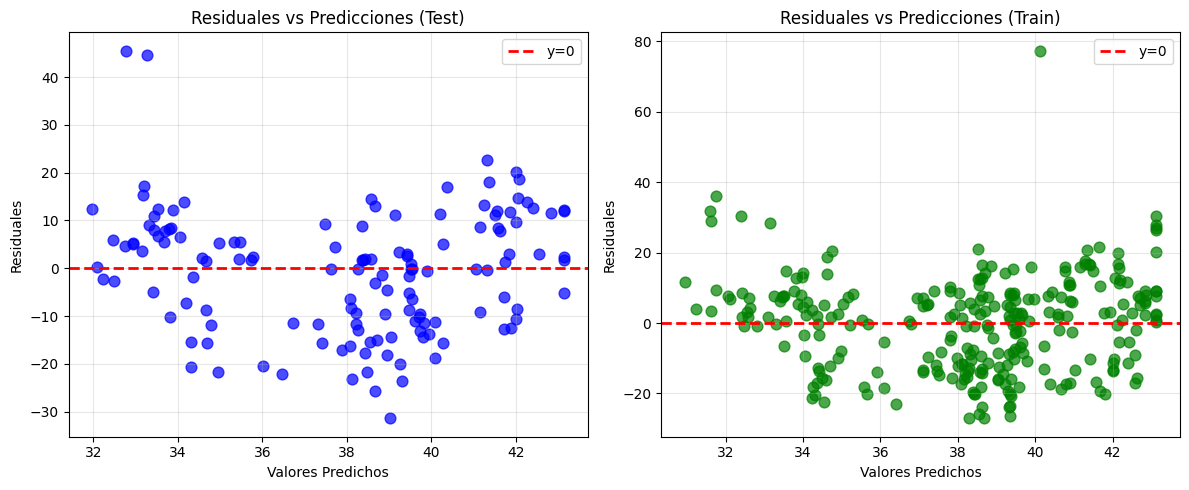

=== INTERPRETACIÓN DEL GRÁFICO ===
✅ BUENO: Los puntos están distribuidos aleatoriamente alrededor de y=0
✅ BUENO: No hay patrones evidentes (forma de embudo, curvas, etc.)
✅ BUENO: La varianza parece constante a lo largo del rango de predicciones
❌ MALO: Si hay patrones sistemáticos, indica violación de supuestos


In [27]:
# Gráfico de residuales vs valores ajustados
plt.figure(figsize=(12, 5))

# Subplot 1: Residuales vs Predicciones (Conjunto de prueba)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuales, alpha=0.7, color='blue', s=60)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='y=0')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales vs Predicciones (Test)')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 2: Residuales vs Predicciones (Conjunto de entrenamiento)
plt.subplot(1, 2, 2)
plt.scatter(y_pred_train, residuales_train, alpha=0.7, color='green', s=60)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='y=0')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales vs Predicciones (Train)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("=== INTERPRETACIÓN DEL GRÁFICO ===")
print("✅ BUENO: Los puntos están distribuidos aleatoriamente alrededor de y=0")
print("✅ BUENO: No hay patrones evidentes (forma de embudo, curvas, etc.)")
print("✅ BUENO: La varianza parece constante a lo largo del rango de predicciones")
print("❌ MALO: Si hay patrones sistemáticos, indica violación de supuestos")

## 🔔 Análisis de Normalidad de los Residuales

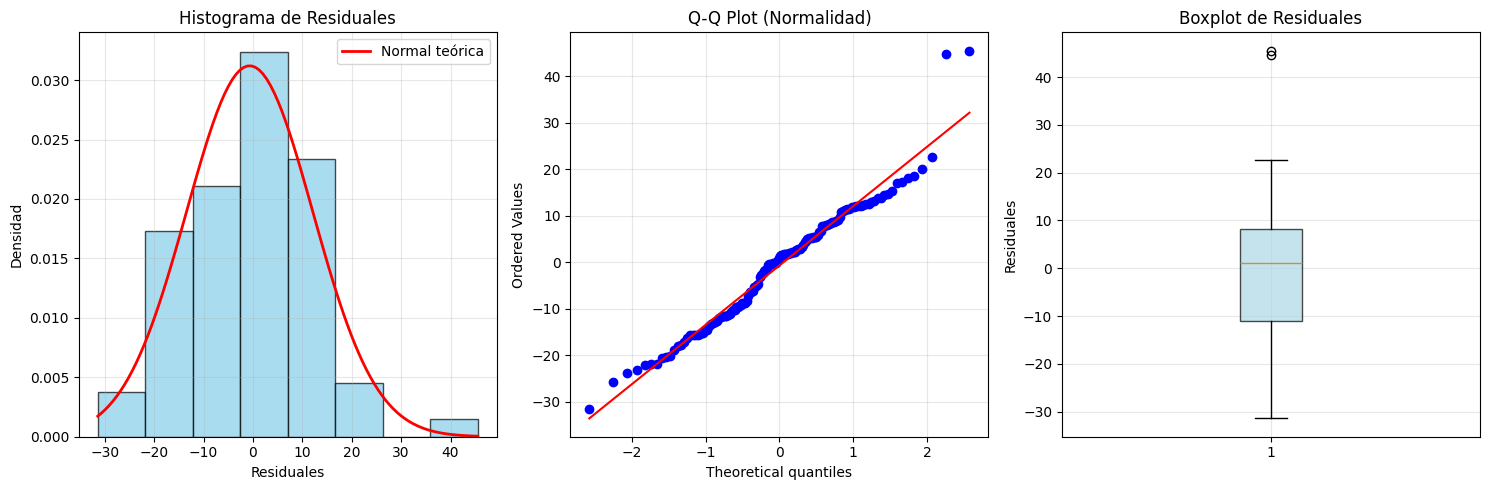

=== PRUEBAS DE NORMALIDAD ===
Shapiro-Wilk Test:
  Estadístico: 0.968962
  p-valor: 0.003095
  ❌ Se rechaza H0: Los residuales NO siguen distribución normal (p ≤ 0.05)

=== INTERPRETACIÓN Q-Q PLOT ===
✅ BUENO: Los puntos siguen aproximadamente la línea diagonal
❌ MALO: Desviaciones sistemáticas de la línea diagonal


In [28]:
# Análisis de normalidad de los residuales
plt.figure(figsize=(15, 5))

# Subplot 1: Histograma de residuales
plt.subplot(1, 3, 1)
plt.hist(residuales, bins=8, density=True, alpha=0.7, color='skyblue', edgecolor='black')
# Superponemos una distribución normal para comparar
mu, sigma = np.mean(residuales), np.std(residuales)
x = np.linspace(np.min(residuales), np.max(residuales), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal teórica')
plt.xlabel('Residuales')
plt.ylabel('Densidad')
plt.title('Histograma de Residuales')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Q-Q Plot (Quantile-Quantile)
plt.subplot(1, 3, 2)
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normalidad)')
plt.grid(True, alpha=0.3)

# Subplot 3: Boxplot para detectar outliers
plt.subplot(1, 3, 3)
plt.boxplot(residuales, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Residuales')
plt.title('Boxplot de Residuales')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba de normalidad de Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(residuales)

print("=== PRUEBAS DE NORMALIDAD ===")
print(f"Shapiro-Wilk Test:")
print(f"  Estadístico: {shapiro_stat:.6f}")
print(f"  p-valor: {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("  ✅ NO se rechaza H0: Los residuales siguen distribución normal (p > 0.05)")
else:
    print("  ❌ Se rechaza H0: Los residuales NO siguen distribución normal (p ≤ 0.05)")

print(f"\n=== INTERPRETACIÓN Q-Q PLOT ===")
print("✅ BUENO: Los puntos siguen aproximadamente la línea diagonal")
print("❌ MALO: Desviaciones sistemáticas de la línea diagonal")

## 📏 Prueba de Homocedasticidad (Breusch-Pagan)

=== PRUEBA DE BREUSCH-PAGAN (HOMOCEDASTICIDAD) ===
H0: Homocedasticidad (varianza constante)
H1: Heterocedasticidad (varianza no constante)
Estadístico BP: 1.433720
p-valor: 0.231158
✅ NO se rechaza H0: HAY homocedasticidad (p > 0.05)
   La varianza de los errores es constante


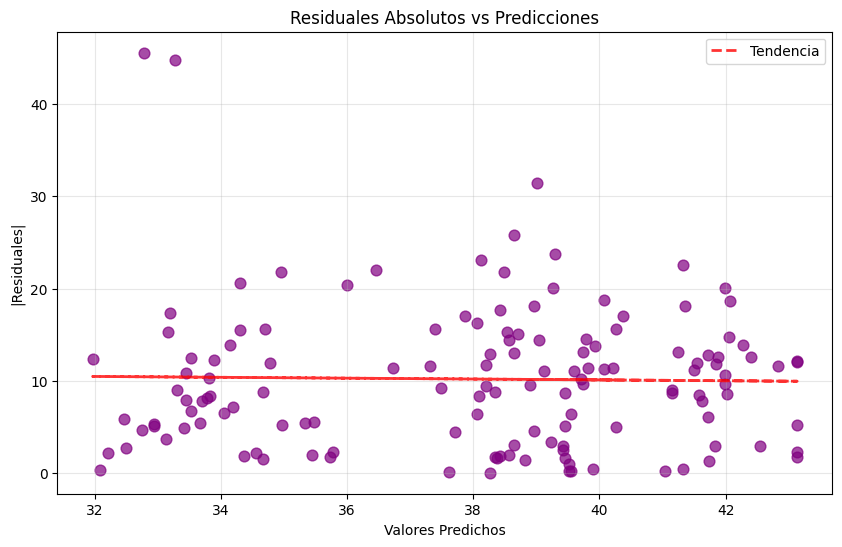


=== INTERPRETACIÓN VISUAL ===
✅ BUENO: La línea roja es aproximadamente horizontal
❌ MALO: La línea roja tiene pendiente pronunciada (forma de embudo)


In [29]:
# Implementamos la prueba de Breusch-Pagan manualmente
# Esta prueba evalúa si la varianza de los errores es constante (homocedasticidad)

# Paso 1: Calculamos los residuales al cuadrado
residuales_cuadrados = residuales ** 2

# Paso 2: Regresión de residuales² vs valores predichos
from sklearn.linear_model import LinearRegression
reg_bp = LinearRegression()
reg_bp.fit(y_pred.reshape(-1, 1), residuales_cuadrados)

# Paso 3: Calculamos R² de esta regresión auxiliar
y_pred_bp = reg_bp.predict(y_pred.reshape(-1, 1))
ss_res_bp = np.sum((residuales_cuadrados - y_pred_bp) ** 2)
ss_tot_bp = np.sum((residuales_cuadrados - np.mean(residuales_cuadrados)) ** 2)
r2_bp = 1 - (ss_res_bp / ss_tot_bp)

# Paso 4: Estadístico de prueba (n * R²)
n = len(residuales)
bp_stat = n * r2_bp
bp_p_value = 1 - stats.chi2.cdf(bp_stat, df=1)

print("=== PRUEBA DE BREUSCH-PAGAN (HOMOCEDASTICIDAD) ===")
print("H0: Homocedasticidad (varianza constante)")
print("H1: Heterocedasticidad (varianza no constante)")
print(f"Estadístico BP: {bp_stat:.6f}")
print(f"p-valor: {bp_p_value:.6f}")

if bp_p_value > 0.05:
    print("✅ NO se rechaza H0: HAY homocedasticidad (p > 0.05)")
    print("   La varianza de los errores es constante")
else:
    print("❌ Se rechaza H0: HAY heterocedasticidad (p ≤ 0.05)")
    print("   La varianza de los errores NO es constante")

# Visualización adicional: Residuales absolutos vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, np.abs(residuales), alpha=0.7, color='purple', s=60)
plt.xlabel('Valores Predichos')
plt.ylabel('|Residuales|')
plt.title('Residuales Absolutos vs Predicciones')
plt.grid(True, alpha=0.3)

# Ajustamos una línea de tendencia para visualizar heterocedasticidad
z = np.polyfit(y_pred, np.abs(residuales), 1)
p = np.poly1d(z)
plt.plot(y_pred, p(y_pred), "r--", alpha=0.8, linewidth=2, label='Tendencia')
plt.legend()
plt.show()

print(f"\n=== INTERPRETACIÓN VISUAL ===")
print("✅ BUENO: La línea roja es aproximadamente horizontal")
print("❌ MALO: La línea roja tiene pendiente pronunciada (forma de embudo)")

## 🎯 Detección de Outliers e Influencia

=== DETECCIÓN DE OUTLIERS ===
1. Residuales estandarizados > |2|:
   Número de outliers: 4
   Índices: [ 47  72  91 108]
   Valores residuales: [-25.75183276  45.52347175 -31.41381835  44.72226094]

2. Regla IQR (1.5 * IQR):
   Q1: -10.9972, Q3: 8.3043, IQR: 19.3015
   Límites: [-39.9495, 37.2566]
   Número de outliers: 2
   Índices: [ 72 108]


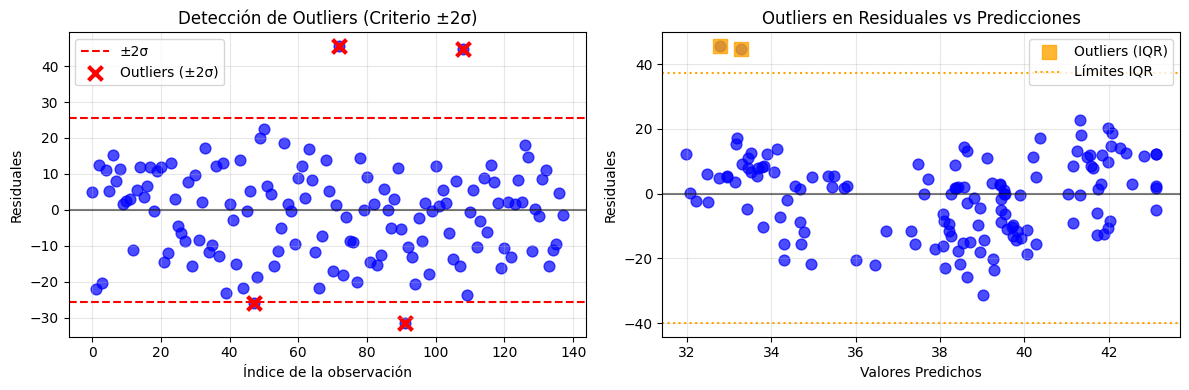


=== RESUMEN DE OUTLIERS ===
Total de observaciones: 138
Outliers por criterio ±2σ: 4 (2.9%)
Outliers por criterio IQR: 2 (1.4%)
✅ BUENO: Pocos outliers detectados (< 5% de las observaciones)


In [35]:
# Detección de outliers usando diferentes criterios
print("=== DETECCIÓN DE OUTLIERS ===")

# Criterio 1: Residuales estandarizados (> 2 o < -2)
residuales_std = residuales / np.std(residuales)
outliers_std = np.where(np.abs(residuales_std) > 2)[0]

print(f"1. Residuales estandarizados > |2|:")
print(f"   Número de outliers: {len(outliers_std)}")
if len(outliers_std) > 0:
    print(f"   Índices: {outliers_std}")
    print(f"   Valores residuales: {residuales[outliers_std]}")

# Criterio 2: Regla del rango intercuartílico (IQR)
Q1 = np.percentile(residuales, 25)
Q3 = np.percentile(residuales, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = np.where((residuales < lower_bound) | (residuales > upper_bound))[0]

print(f"\n2. Regla IQR (1.5 * IQR):")
print(f"   Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
print(f"   Límites: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"   Número de outliers: {len(outliers_iqr)}")
if len(outliers_iqr) > 0:
    print(f"   Índices: {outliers_iqr}")

# Visualización de outliers
plt.figure(figsize=(12, 4))

# Subplot 1: Residuales con límites
plt.subplot(1, 2, 1)
plt.scatter(range(len(residuales)), residuales, alpha=0.7, color='blue', s=60)
plt.axhline(y=2*np.std(residuales), color='red', linestyle='--', label='±2σ')
plt.axhline(y=-2*np.std(residuales), color='red', linestyle='--')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
if len(outliers_std) > 0:
    plt.scatter(outliers_std, residuales[outliers_std], color='red', s=100, 
               marker='x', label='Outliers (±2σ)', linewidth=3)
plt.xlabel('Índice de la observación')
plt.ylabel('Residuales')
plt.title('Detección de Outliers (Criterio ±2σ)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Residuales vs valores predichos con outliers marcados
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuales, alpha=0.7, color='blue', s=60)
if len(outliers_iqr) > 0:
    plt.scatter(y_pred[outliers_iqr], residuales[outliers_iqr], color='orange', 
               s=100, marker='s', label='Outliers (IQR)', alpha=0.8)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.axhline(y=upper_bound, color='orange', linestyle=':', label='Límites IQR')
plt.axhline(y=lower_bound, color='orange', linestyle=':')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Outliers en Residuales vs Predicciones')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas adicionales sobre outliers
print(f"\n=== RESUMEN DE OUTLIERS ===")
total_obs = len(residuales)
print(f"Total de observaciones: {total_obs}")
print(f"Outliers por criterio ±2σ: {len(outliers_std)} ({len(outliers_std)/total_obs*100:.1f}%)")
print(f"Outliers por criterio IQR: {len(outliers_iqr)} ({len(outliers_iqr)/total_obs*100:.1f}%)")

# Evaluación general
if len(outliers_std) <= 0.05 * total_obs:  # Menos del 5%
    print("✅ BUENO: Pocos outliers detectados (< 5% de las observaciones)")
else:
    print("⚠️ ATENCIÓN: Muchos outliers detectados (≥ 5% de las observaciones)")

## 📋 Resumen del Análisis de Residuales

In [31]:
# Resumen completo del análisis de residuales
print("="*60)
print("     REPORTE COMPLETO DEL ANÁLISIS DE RESIDUALES")
print("="*60)

print("\n🔍 SUPUESTOS DE LA REGRESIÓN LINEAL:")
print("1. Linealidad: La relación entre X e Y es lineal")
print("2. Independencia: Los errores no están correlacionados")
print("3. Homocedasticidad: Varianza constante de los errores")
print("4. Normalidad: Los residuales siguen distribución normal")

print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
print(f"   Media de residuales: {np.mean(residuales):.6f} (debe ≈ 0)")
print(f"   Desviación estándar: {np.std(residuales):.4f}")
print(f"   Asimetría: {stats.skew(residuales):.4f} (debe ≈ 0)")
print(f"   Curtosis: {stats.kurtosis(residuales):.4f} (debe ≈ 0)")

print(f"\n🔔 NORMALIDAD:")
print(f"   Shapiro-Wilk p-valor: {shapiro_p:.6f}")
if shapiro_p > 0.05:
    print("   ✅ CUMPLIDO: Residuales siguen distribución normal")
else:
    print("   ❌ VIOLADO: Residuales NO siguen distribución normal")

print(f"\n📏 HOMOCEDASTICIDAD:")
print(f"   Breusch-Pagan p-valor: {bp_p_value:.6f}")
if bp_p_value > 0.05:
    print("   ✅ CUMPLIDO: Varianza constante (homocedasticidad)")
else:
    print("   ❌ VIOLADO: Varianza no constante (heterocedasticidad)")

print(f"\n🎯 OUTLIERS:")
print(f"   Por criterio ±2σ: {len(outliers_std)} outliers ({len(outliers_std)/len(residuales)*100:.1f}%)")
print(f"   Por criterio IQR: {len(outliers_iqr)} outliers ({len(outliers_iqr)/len(residuales)*100:.1f}%)")

# Evaluación general del modelo
print(f"\n🎖️ EVALUACIÓN GENERAL:")
cumple_normalidad = shapiro_p > 0.05
cumple_homocedasticidad = bp_p_value > 0.05
pocos_outliers = len(outliers_std) <= 0.05 * len(residuales)

supuestos_cumplidos = sum([cumple_normalidad, cumple_homocedasticidad, pocos_outliers])

if supuestos_cumplidos == 3:
    print("   🏆 EXCELENTE: Todos los supuestos principales se cumplen")
    print("   📈 El modelo de regresión lineal es apropiado para estos datos")
elif supuestos_cumplidos == 2:
    print("   ✅ BUENO: La mayoría de supuestos se cumplen")
    print("   ⚠️ Considerar algunas mejoras en el modelo")
elif supuestos_cumplidos == 1:
    print("   ⚠️ REGULAR: Varios supuestos se violan")
    print("   🔧 Se recomienda transformar datos o usar otros modelos")
else:
    print("   ❌ PROBLEMÁTICO: La mayoría de supuestos se violan")
    print("   🚨 El modelo de regresión lineal simple NO es apropiado")

print(f"\n💡 RECOMENDACIONES:")
if not cumple_normalidad:
    print("   • Considerar transformación de variables (log, sqrt, Box-Cox)")
if not cumple_homocedasticidad:
    print("   • Usar regresión robusta o errores estándar robustos")
if not pocos_outliers:
    print("   • Investigar y posiblemente remover outliers extremos")
if supuestos_cumplidos >= 2:
    print("   • El modelo actual es confiable para hacer predicciones")

print("="*60)

     REPORTE COMPLETO DEL ANÁLISIS DE RESIDUALES

🔍 SUPUESTOS DE LA REGRESIÓN LINEAL:
1. Linealidad: La relación entre X e Y es lineal
2. Independencia: Los errores no están correlacionados
3. Homocedasticidad: Varianza constante de los errores
4. Normalidad: Los residuales siguen distribución normal

📊 ESTADÍSTICAS DESCRIPTIVAS:
   Media de residuales: -0.667864 (debe ≈ 0)
   Desviación estándar: 12.7840
   Asimetría: 0.3571 (debe ≈ 0)
   Curtosis: 0.9182 (debe ≈ 0)

🔔 NORMALIDAD:
   Shapiro-Wilk p-valor: 0.003095
   ❌ VIOLADO: Residuales NO siguen distribución normal

📏 HOMOCEDASTICIDAD:
   Breusch-Pagan p-valor: 0.231158
   ✅ CUMPLIDO: Varianza constante (homocedasticidad)

🎯 OUTLIERS:
   Por criterio ±2σ: 4 outliers (2.9%)
   Por criterio IQR: 2 outliers (1.4%)

🎖️ EVALUACIÓN GENERAL:
   ✅ BUENO: La mayoría de supuestos se cumplen
   ⚠️ Considerar algunas mejoras en el modelo

💡 RECOMENDACIONES:
   • Considerar transformación de variables (log, sqrt, Box-Cox)
   • El modelo actual 

# 🔬 10. Análisis profundo del modelo

## 🧮 Disección matemática

En esta sección vamos a "abrir la caja negra" de nuestro modelo para entender:

1. **📏 Ecuación exacta** que está usando el modelo
2. **🎯 Significado práctico** de cada coeficiente
3. **📊 Métricas adicionales** de evaluación
4. **🔍 Calidad general** del ajuste

## 🎯 ¿Por qué es importante?

Entender los **parámetros internos** del modelo nos permite:
- **Interpretar** los resultados de manera práctica
- **Explicar** las predicciones a otros
- **Detectar** si los resultados tienen sentido lógico
- **Comparar** diferentes modelos

## 💼 Aplicación práctica

Imagina que eres un agente inmobiliario: ¿podrías explicar a un cliente cómo la antigüedad afecta el precio basándote en estos coeficientes?

In [32]:
# Obtenemos los parámetros del modelo entrenado
intercept = regression.intercept_  # Término independiente (β₀)
coef = regression.coef_[0]        # Coeficiente de la pendiente (β₁)

print("=== ECUACIÓN DE LA RECTA DE REGRESIÓN ===")
print(f"y = {intercept:.2f} + ({coef:.2f}) * x")
print(f"Precio/m² = {intercept:.2f} + ({coef:.2f}) * Años_antiguedad")
print()
print("=== INTERPRETACIÓN DE LOS COEFICIENTES ===")
print(f"• Intercept (β₀): {intercept:.2f}")
print(f"  → Precio esperado por m² cuando la casa es nueva (0 años)")
print(f"• Pendiente (β₁): {coef:.2f}")
if coef < 0:
    print(f"  → Por cada año adicional de antigüedad, el precio disminuye en {abs(coef):.2f} unidades")
else:
    print(f"  → Por cada año adicional de antigüedad, el precio aumenta en {coef:.2f} unidades")

=== ECUACIÓN DE LA RECTA DE REGRESIÓN ===
y = 43.13 + (-0.28) * x
Precio/m² = 43.13 + (-0.28) * Años_antiguedad

=== INTERPRETACIÓN DE LOS COEFICIENTES ===
• Intercept (β₀): 43.13
  → Precio esperado por m² cuando la casa es nueva (0 años)
• Pendiente (β₁): -0.28
  → Por cada año adicional de antigüedad, el precio disminuye en 0.28 unidades


In [33]:
# Calculamos métricas adicionales de evaluación del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
# Error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("=== MÉTRICAS DE EVALUACIÓN DEL MODELO ===")
print(f"R² Score: {r2:.4f}")
print(f"  → El modelo explica el {r2*100:.2f}% de la variabilidad")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"  → Error promedio en las predicciones: ±{rmse:.2f} unidades")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"  → Error absoluto promedio: {mae:.2f} unidades")
print()
print("=== CALIDAD DEL MODELO ===")
if r2 > 0.8:
    print("✅ Excelente ajuste del modelo")
elif r2 > 0.6:
    print("✅ Buen ajuste del modelo")
elif r2 > 0.4:
    print("⚠️ Ajuste moderado del modelo")
else:
    print("❌ Ajuste pobre del modelo")

=== MÉTRICAS DE EVALUACIÓN DEL MODELO ===
R² Score: 0.0217
  → El modelo explica el 2.17% de la variabilidad
MSE (Error Cuadrático Medio): 163.88
RMSE (Raíz del Error Cuadrático Medio): 12.80
  → Error promedio en las predicciones: ±12.80 unidades
MAE (Error Absoluto Medio): 10.20
  → Error absoluto promedio: 10.20 unidades

=== CALIDAD DEL MODELO ===
❌ Ajuste pobre del modelo


# 🚀 11. Predicciones con nuevos datos

## 🎯 Poniendo el modelo en práctica

¡Es hora de usar nuestro modelo entrenado para hacer predicciones reales! En esta sección:

1. **🏠 Simularemos** casas con diferentes antigüedades
2. **🔮 Predeciremos** sus precios usando nuestro modelo
3. **✅ Verificaremos** los cálculos manualmente
4. **💡 Interpretaremos** los resultados

## 💼 Caso de uso real

Imagina que eres un:
- **👨‍💼 Agente inmobiliario** que necesita estimar precios
- **🏗️ Constructor** evaluando el valor de propiedades
- **📊 Analista** proporcionando insights de mercado

## 🧮 Verificación manual

También calcularemos las predicciones **manualmente** usando la ecuación matemática para:
- **Confirmar** que entendemos cómo funciona el modelo
- **Verificar** que scikit-learn está haciendo los cálculos correctos
- **Demostrar** la transparencia del proceso

## 🎓 Aprendizaje clave

Este ejercicio demuestra que machine learning no es "magia negra" - podemos entender y verificar cada paso del proceso.

In [34]:
# Ejemplo práctico: predecir el precio de casas con diferentes antigüedades
nuevas_antigüedades = np.array([[5], [10], [15], [25]])

# Realizamos las predicciones
nuevas_predicciones = regression.predict(nuevas_antigüedades)

print("=== PREDICCIONES PARA NUEVAS CASAS ===")
for i, (antiguedad, precio) in enumerate(zip(nuevas_antigüedades.flatten(), nuevas_predicciones)):
    print(f"Casa de {antiguedad} años: {precio:.2f} unidades por m²")

print()
print("=== VERIFICACIÓN MANUAL DE LA FÓRMULA ===")
print("Usando la ecuación: y = {:.2f} + ({:.2f}) * x".format(intercept, coef))
for antiguedad in nuevas_antigüedades.flatten():
    precio_manual = intercept + coef * antiguedad
    print(f"Casa de {antiguedad} años: {precio_manual:.2f} unidades por m² (calculado manualmente)")

=== PREDICCIONES PARA NUEVAS CASAS ===
Casa de 5 años: 41.74 unidades por m²
Casa de 10 años: 40.35 unidades por m²
Casa de 15 años: 38.96 unidades por m²
Casa de 25 años: 36.17 unidades por m²

=== VERIFICACIÓN MANUAL DE LA FÓRMULA ===
Usando la ecuación: y = 43.13 + (-0.28) * x
Casa de 5 años: 41.74 unidades por m² (calculado manualmente)
Casa de 10 años: 40.35 unidades por m² (calculado manualmente)
Casa de 15 años: 38.96 unidades por m² (calculado manualmente)
Casa de 25 años: 36.17 unidades por m² (calculado manualmente)


# 🎓 12. Conclusiones y próximos pasos

## ✅ Lo que hemos logrado

En este ejercicio hemos completado un **flujo completo de machine learning**:

1. **📊 Carga de datos** y exploración inicial
2. **🔄 División** en conjuntos de entrenamiento y prueba
3. **🤖 Entrenamiento** de un modelo de regresión lineal simple
4. **🔮 Predicciones** en datos no vistos
5. **📈 Visualización** de resultados
6. **🎯 Evaluación** con múltiples métricas
7. **? Análisis de residuales** y validación de supuestos
8. **?🔬 Análisis profundo** de parámetros del modelo
9. **🚀 Aplicación práctica** con nuevos datos

## 🧠 Conceptos clave aprendidos

### Matemáticos:
- Ecuación de la recta: **y = β₀ + β₁x**
- Método de **mínimos cuadrados**
- **Coeficiente de determinación (R²)**
- **Análisis de residuales** y supuestos de regresión

### Machine Learning:
- **División train/test** y su importancia
- **Overfitting** vs generalización
- **Métricas de evaluación** (R², MSE, RMSE, MAE)
- **Validación de supuestos** del modelo

### Estadísticos:
- **Pruebas de normalidad** (Shapiro-Wilk)
- **Homocedasticidad** (Breusch-Pagan)
- **Detección de outliers** (criterios estadísticos)
- **Interpretación de residuales**

### Prácticos:
- **Interpretación** de coeficientes
- **Análisis visual** de resultados
- **Verificación manual** de predicciones
- **Diagnóstico del modelo** mediante residuales

## 🚀 Próximos pasos

Para profundizar en regresión lineal, podrías:

1. **🔍 Explorar más datos**: Probar con diferentes datasets
2. **📊 Regresión múltiple**: Usar múltiples variables predictoras
3. **🛠️ Preprocesamiento**: Normalización, tratamiento de outliers
4. **📈 Validación cruzada**: Técnicas más robustas de evaluación
5. **🤖 Otros modelos**: Random Forest, SVM, etc.
6. **🔧 Transformaciones**: Box-Cox, log, sqrt para mejorar supuestos
7. **📋 Regresión robusta**: Para datos con outliers o heterocedasticidad

## 💭 Reflexión final

> **"Un buen modelo no es solo el que predice bien, sino el que cumple los supuestos estadísticos y puede ser interpretado de manera confiable"**

### Preguntas para reflexionar:
- ¿Tu modelo cumple todos los supuestos de la regresión lineal?
- ¿Los residuales te dan confianza en las predicciones?
- ¿Podrías explicar los resultados a alguien sin conocimientos técnicos?
- ¿Has logrado entender cómo la antigüedad influye en el precio de las casas según nuestro modelo?